In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [2]:

def clean_data(df):
    # Split text using string ';' in column: 'Select your preferred solutions, please make sure to review the details of the solutions in the link provided'
    loc_0 = df.columns.get_loc('Solutions')
    df_split = df['Solutions'].str.split(pat=';', expand=True).add_prefix('Solutions_')
    df = pd.concat([df.iloc[:, :loc_0], df_split, df.iloc[:, loc_0:]], axis=1)
    df = df.drop(columns=['Solutions','Solutions_3'])
    return df

def rename_and_dorp_columns(df):
    df.rename(columns={"Select your preferred solutions, please make sure to review the details of the solutions in the link provided": "Solutions"},inplace=True)
    df.rename(columns={"First Solution Selected": "Prospect_0"},inplace=True)
    df.rename(columns={"Second Solution Selected": "Prospect_1"},inplace=True)
    df.rename(columns={"Third Solution Selected": "Prospect_2"},inplace=True)
    df.drop(columns=['Start time', 'Completion time', 'Last modified time'], inplace=True)
    return df


def pivot_data(df):
    df1 = df[['ID', 'Name', 'Solutions_0', 'Prospect_0']].rename(columns={'Solutions_0': 'Solution', 'Prospect_0': 'Prospect'})
    df1['Option'] = 1
    df2 = df[['ID', 'Name', 'Solutions_1', 'Prospect_1']].rename(columns={'Solutions_1': 'Solution', 'Prospect_1': 'Prospect'})
    df2['Option'] = 2
    df3 = df[['ID', 'Name', 'Solutions_2', 'Prospect_2']].rename(columns={'Solutions_2': 'Solution', 'Prospect_2': 'Prospect'})
    df3['Option'] = 3
    df = pd.concat([df1, df2, df3], ignore_index=True)
    return df

# Loaded variable 'df' from URI: /Users/alonso/Dev/git/motivus/data-wrangling/data/AI Solution Selection Survey(1-14).xlsx
df = pd.read_excel(r'./input_data/AI Solution Selection Survey(1-20).xlsx')

df_renamed = rename_and_dorp_columns(df.copy())

df_clean = clean_data(df_renamed.copy())

df_pivot = pivot_data(df_clean.copy())

category_counts = df_pivot.groupby('Solution').size().reset_index(name='Count').sort_values(by='Count', ascending=True)

category_counts


,Solution,Count
2,BFSI - Claims Management Automation,1
11,Health - Cohort Building with Knowledge Graphs,1
9,Health - Biomedical Information Retrieval with...,2
16,Retail - Fine-grain demand forecasting,2
4,BFSI - Hyper-Personalization,2
14,Retail - AI & LLMs for various applications,2
6,Cross Industry - Contact Center and Support AI,2
13,Health - R&D Optimization with Knowledge Graphs,2
12,Health - HL7v2 messages for Real-Time Analytics,2
17,Retail - Hyper Personalization,2


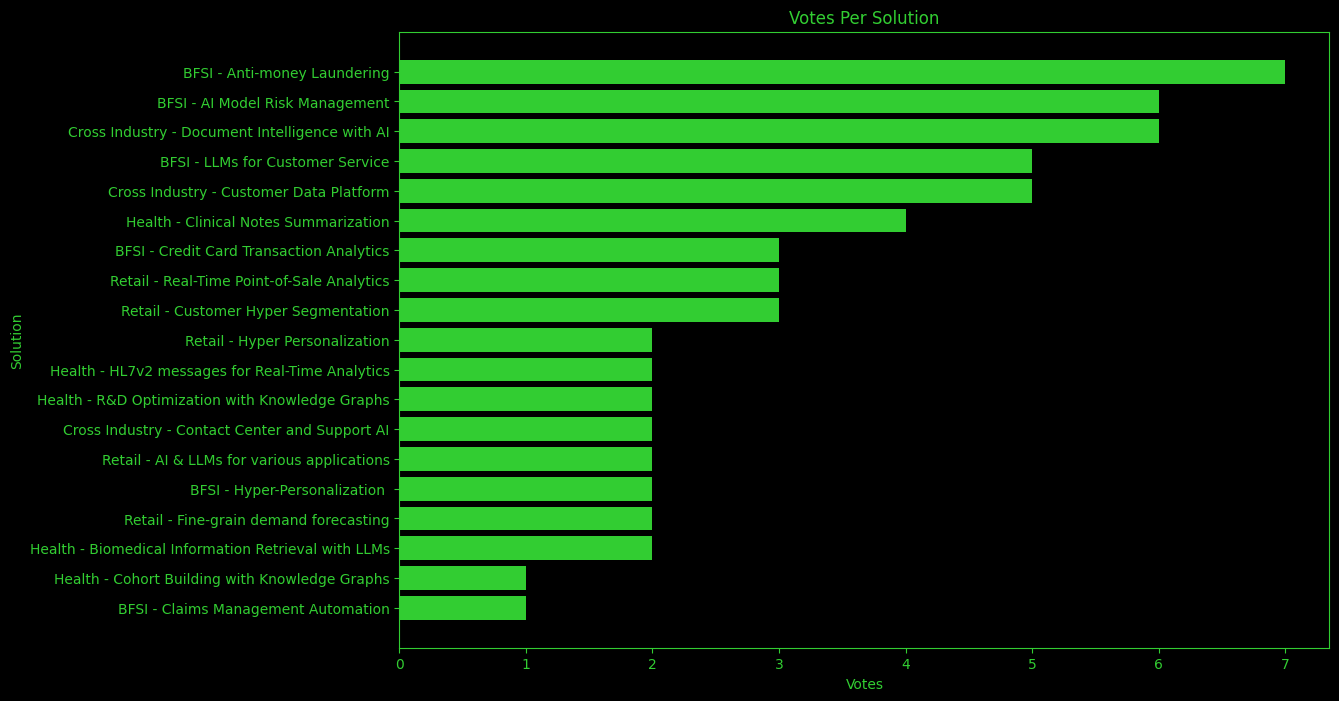

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('black')  # Background of the figure
ax.set_facecolor('black')          # Background of the plot area

# Create a bar chart with green bars
bars = plt.barh(category_counts['Solution'], category_counts['Count'], color='limegreen')

# Set labels and title colors to green
plt.xlabel('Votes', color='limegreen')
plt.ylabel('Solution', color='limegreen')
plt.title('Votes Per Solution', color='limegreen')

# Customize ticks and spine colors to green
ax.tick_params(colors='limegreen')
ax.spines['top'].set_color('limegreen')
ax.spines['bottom'].set_color('limegreen')
ax.spines['left'].set_color('limegreen')
ax.spines['right'].set_color('limegreen')

In [4]:
from at_openai_helper import *
import os

openai_key = os.getenv('AZURE_AI_GPT-4O-MINI_API_KEY')

azure_endpoint = "https://aiservice-guild-demos-dev-eastus2-01.openai.azure.com/"  
  

openai_api = ATOpenAIIHelper(openai_key,azure_endpoint)


prompt = "You professional services seller specialized in AI. For the given text, determine the name of the prospect that we can offer the an AI solution. If multiple clients found, provide all separated by comma. Give the result in plain text in Title Case , just with the name of the prospect or NA. Do not add markdown formatting."

In [5]:
def extract_value_func(row):
  return row['Prospect']

In [6]:
df_pivot['Prospect_Inferance'] = openai_api.async_pandas_apply_for_func_result(df_pivot,prompt,extract_value_func)

In [7]:

df_pivot

,ID,Name,Solution,Prospect,Option,Prospect_Inferance
0,2,Raul,Cross Industry - Document Intelligence with AI,Cross Industry - Customer Data Platform for bo...,1,"NBC, Teco"
1,3,Ned,Cross Industry - Document Intelligence with AI,Document intelligence improves accuracy and sa...,1,"Legal, Financial, Health Care"
2,4,José,Cross Industry - Contact Center and Support AI,Cross Industry - Contact Center and Support AI...,1,Riot Games
3,5,Jorge,Retail - AI & LLMs for various applications,Customer Data Platform Walmart,1,Walmart
4,6,Rod,BFSI - LLMs for Customer Service,"Anti Money Laundering, Santander, Scotia and C...",1,"Santander, Scotia, Citi"
5,7,Rod,Cross Industry - Document Intelligence with AI,Healthcare clients have mentioned the need for...,1,Senderra
6,8,Nac,BFSI - Credit Card Transaction Analytics,BFSI - AI Model Risk Management SCOTIBANK Y GE...,1,"Scotiabank, Gentera"
7,9,Eder,BFSI - LLMs for Customer Service,LLMs for Customer Service - Peredur,1,Peredur
8,10,Sur,BFSI - AI Model Risk Management,"Anti Money Laundering - BNY, Wells Fargo, Morg...",1,"BNY, Wells Fargo, Morgan Stanley"
9,11,Sid,BFSI - AI Model Risk Management,BFSI - AI Model Risk Management - To analyse m...,1,BFSI


In [8]:
def clean_data_prospects(df):
    df['Prospect_Inferance'] = df['Prospect_Inferance'].str.split(',')
    df = df.explode('Prospect_Inferance')
    df.rename(columns={"Prospect": "Prospect_Original"},inplace=True)
    df.rename(columns={"Prospect_Inferance": "Prospect"},inplace=True)
    df['Prospect'] = df['Prospect'].str.strip()
    return df


df_prospects = clean_data_prospects(df_pivot.copy())

In [9]:
df_prospects


,ID,Name,Solution,Prospect_Original,Option,Prospect
0,2,Raul,Cross Industry - Document Intelligence with AI,Cross Industry - Customer Data Platform for bo...,1,NBC
0,2,Raul,Cross Industry - Document Intelligence with AI,Cross Industry - Customer Data Platform for bo...,1,Teco
1,3,Ned,Cross Industry - Document Intelligence with AI,Document intelligence improves accuracy and sa...,1,Legal
1,3,Ned,Cross Industry - Document Intelligence with AI,Document intelligence improves accuracy and sa...,1,Financial
1,3,Ned,Cross Industry - Document Intelligence with AI,Document intelligence improves accuracy and sa...,1,Health Care
...,...,...,...,...,...,...
55,17,Fel,BFSI - LLMs for Customer Service,Graph analytics maps relationships between acc...,3,Santander MX
56,18,Ric,Health - Biomedical Information Retrieval with...,Biomedical Information Retrieval with LLMs - ...,3,Medica Sur
57,19,Andy,Health - Clinical Notes Summarization,Health - Clinical Notes Summarization - For Fa...,3,FallonHealth
58,20,Fecu,Retail - Real-Time Point-of-Sale Analytics,Cross Industry - Customer Data Platform,3,NA


In [10]:
df_pivot.to_excel(r'./output_data/AI_Solution_Selection_Survey_clean.xlsx', index=False)

In [11]:
#Remove NA values
df_prospects = df_prospects[df_prospects['Prospect']!="NA"]

prospects_count_df = df_prospects.groupby('Prospect').size().reset_index(name='Votes').sort_values(by='Votes', ascending=False)

In [12]:
prospects_count_df

,Prospect,Votes
44,St Jude,5
11,Cigna,4
43,Senderra,4
0,Aetna,3
28,NBC,3
32,Proa,3
36,Riot Games,3
37,Saint Vincent,3
38,Santander,3
12,Citi,3


In [13]:
top_20 = prospects_count_df.nlargest(20, 'Votes')

top_20

,Prospect,Votes
44,St Jude,5
11,Cigna,4
43,Senderra,4
0,Aetna,3
28,NBC,3
32,Proa,3
36,Riot Games,3
37,Saint Vincent,3
38,Santander,3
12,Citi,3


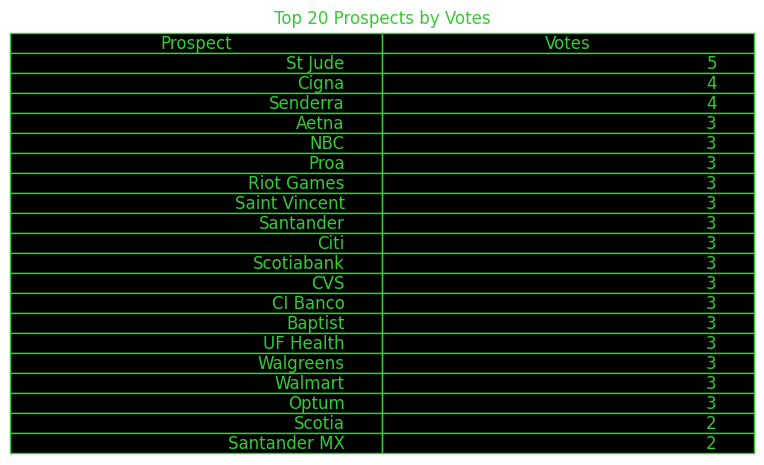

In [14]:
fig, ax = plt.subplots(figsize=(8, 5.5))

fig.patch.set_facecolor('black') # Background of the figure
ax.set_facecolor('black')         # Background of the plot area

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

tbl = ax.table(cellText=top_20.values, colLabels=top_20.columns, loc='center')

# Style the table
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)

# Set table colors
for key, cell in tbl.get_celld().items():
    cell.set_edgecolor('limegreen')
    cell.set_text_props(color='limegreen')
    cell.set_facecolor('black')

plt.title('Top 20 Prospects by Votes', color='limegreen')
#fig.tight_layout()

plt.show()